This short note is a theoretical implementation (on a synthetic dataset) of ANN using Perceptrons, written to bolster the understanding of ANN models using perceptrons.

Highlights:

1. Minimization of the Log-Loss function instead of MSE, for convexity reasons, still using basic calculus idea of Gradient descent

2. Due to unlayered nature, we can only classify linear data effectively. For non-linear data, layered perceptrons are more apt. 


In [168]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
x, y = make_blobs(n_samples = 1000, n_features = 2, centers = 2, random_state = 10)

In [170]:
print(x.shape, y.shape)

(1000, 2) (1000,)


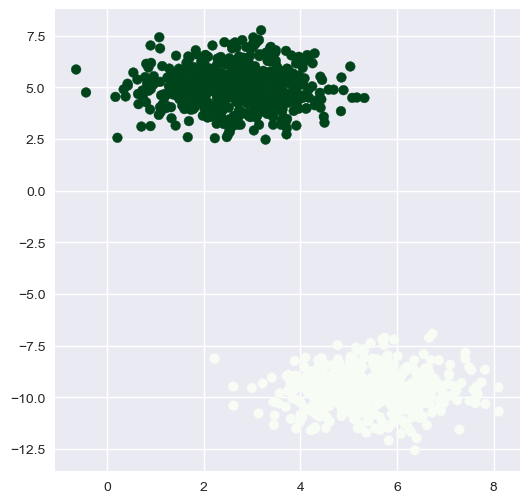

In [171]:
plt.figure(figsize = (6,6))
plt.scatter(x[:,0], x[:,1], c = y, cmap = 'Greens')
plt.show()

In [172]:
# Now, we will try to come up with a linear decision boundary through the use of ANN

# Prediction Function

In [173]:
def sigmoid(z):
    
    return 1/(1 + np.exp(-z))

In [174]:
def predict(x, weights):
    
    z = np.dot(x, weights)
    
    return sigmoid(z)

# Loss Function

In [175]:
def loss(x, y, weights):
    
    y_pred = predict(x, weights)
    
    cost = np.mean(- (y * np.log(y_pred) ) - ( (1 - y) * np.log(1 - y_pred) ) ) # using the log-loss function for convexity reasons
                   
    return cost

# Gradient Descent

In [176]:
def update_weights(x, y, weights, learning_rate):
    
    y_pred = predict(x, weights)
    dw = np.dot(x.T, y_pred - y)
    m = x.shape[0]
    
    updated_weights = weights - learning_rate * dw/float(m) 
    
    return updated_weights

# Training the Model

In [177]:
def train(x, y, learning_rate, maxEpochs = 200):
    
    ones = np.ones((x.shape[0], 1))
    
    x = np.hstack((ones, x))
    
    weights = np.zeros(x.shape[1]) # initializing weights
    
    # Iteration and update
    
    for epoch in range(maxEpochs):
        
        weights = update_weights(x, y, weights, learning_rate)
        
        if (epoch % 10 == 0):
            
            l = loss(x, y, weights)
            
            print('The loss for Epoch number %.1d is %.4f'%(epoch, l))
    
    return weights

In [178]:
# following are its results on the blob data

In [179]:
weights = train(x, y, learning_rate = 0.01)

The loss for Epoch number 0 is 0.5662
The loss for Epoch number 10 is 0.2017
The loss for Epoch number 20 is 0.1265
The loss for Epoch number 30 is 0.0929
The loss for Epoch number 40 is 0.0736
The loss for Epoch number 50 is 0.0611
The loss for Epoch number 60 is 0.0523
The loss for Epoch number 70 is 0.0457
The loss for Epoch number 80 is 0.0406
The loss for Epoch number 90 is 0.0366
The loss for Epoch number 100 is 0.0333
The loss for Epoch number 110 is 0.0306
The loss for Epoch number 120 is 0.0282
The loss for Epoch number 130 is 0.0263
The loss for Epoch number 140 is 0.0246
The loss for Epoch number 150 is 0.0231
The loss for Epoch number 160 is 0.0217
The loss for Epoch number 170 is 0.0206
The loss for Epoch number 180 is 0.0195
The loss for Epoch number 190 is 0.0185


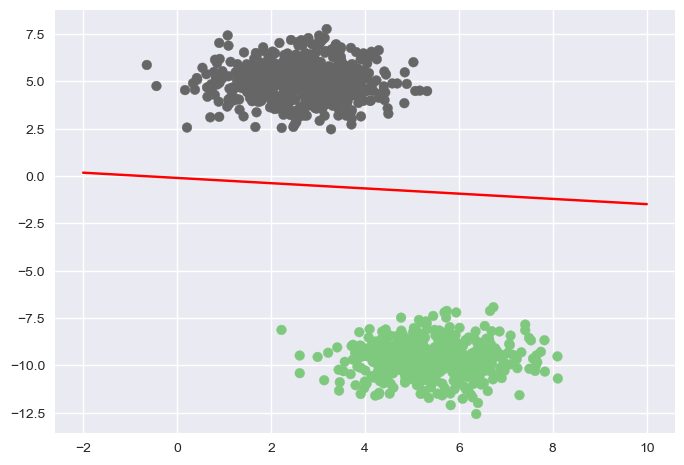

In [180]:
# we are using this plot to only visualize the weights, specifically a 2-d projection of the plane spanned by the weights as

# w2 * x2 + w1 * x1 + w0 = 0

x1 = np.linspace(-2,10,10)
x2 = -(weights[0] + weights[1] * x1)/weights[2]
plt.plot(x1, x2, color = 'red')
plt.scatter(x[:,0], x[:,1], c = y, cmap = plt.cm.Accent)
plt.show()